In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

#### in real life we can have only three types of PDF PMF distributions : 1] right skewed 2] nearly normal 3]left skewed
### we dont need read about properties and appliactions or anything about any type of distribution rather than just normal and standard normal distribution as only they are useful for data scientist , so we convert 1] and 3] to normal distribution
##### right skewed distributions : pareto , lognormal , exponential , gamma , weibull , chi-squared , log-logistic , gumbel ,burr , Frechet|
##### below is example of right skewed distribution

In [2]:
Xlognormal=np.random.lognormal(mean=5,sigma=1,size=100)
Xlognormal=pd.DataFrame(Xlognormal,columns=['Xlognormal'])
Xlognormal.head()

,Xlognormal
0,45.347938
1,113.382176
2,178.356196
3,369.628517
4,155.849790


<Axes: ylabel='Density'>

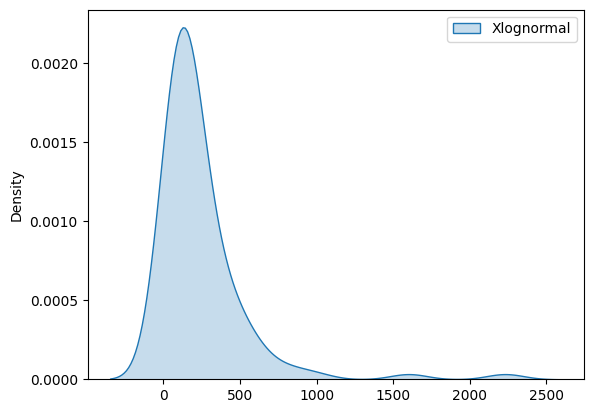

In [3]:
sns.kdeplot(Xlognormal,fill='g')

##### left skewed distributions : Inverse Gamma Distribution , Inverse Chi-Squared Distribution ,Inverse Exponential Distribution ,Inverse Weibull distribution ,Inverse Log-normal Distribution ,Inverse Pareto Distribution ,Negative Binomial Distribution ,Beta Distribution (for certain parameter values) ,F Distribution (for certain parameter values) ,Non-central t-Distribution (for certain parameter values)
##### below is example of left skewed distribution

In [4]:
Xleft=np.power(np.arange(1,100,1),0.5)
Xleft=pd.DataFrame(Xleft,columns=['Xleft'])
Xleft.head()

,Xleft
0,1.000000
1,1.414214
2,1.732051
3,2.000000
4,2.236068


<Axes: xlabel='Xleft', ylabel='Density'>

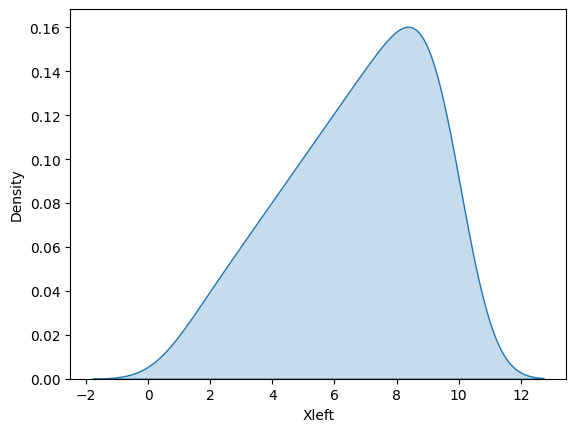

In [5]:
sns.kdeplot(Xleft['Xleft'],fill='g')

### irrespective of whichever distribution we get we need to convert it to normal distribution ,  as maximum regression machine learning algorithms assume that our data is normally distributed having linear relationship between columns , and by feeding them this converted normal distribution , we have sharp increase in their accuracy

### so we use many mathematical transformations : Box-Cox transformation is most widely used amongst them as it converts all kinds of distribution to roughly normal distribution , it is also known as way of converting any skewed data to normal distribution

#### we use function transformer from sklearn transformers for log transform , reciprocal transform , sq transform , else we have power transformer for box-cox and yeo-johnson transform, else quantile transformer(less used)
### data must be scaled before transforming it using function_transformer to improve exactness,and performance
### data doesnt need scaling before transforming using power_transformer , internally Standard scalar is applied 

##### a] log transform : we apply it on right skewed data : it is applied on large scale data to convert it to small scale i.e. logarithmic scale : it is taking logarithm of each data point

In [6]:
from sklearn.preprocessing._function_transformer import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)#fitting the funcn as np.log1p , not np.log to avoid zeroerror as log(0)=infinity

In [7]:
Xlogtrans=trf.fit_transform(Xlognormal)
Xlogtrans.rename(columns={'Xlognormal':'Xlogtrans'},inplace=True)

<Axes: ylabel='Density'>

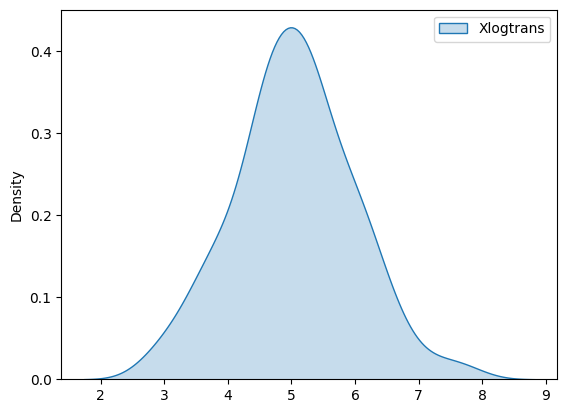

In [8]:
sns.kdeplot(Xlogtrans,fill='m')

### scipy.stats uses better method of plotting QQplot as below

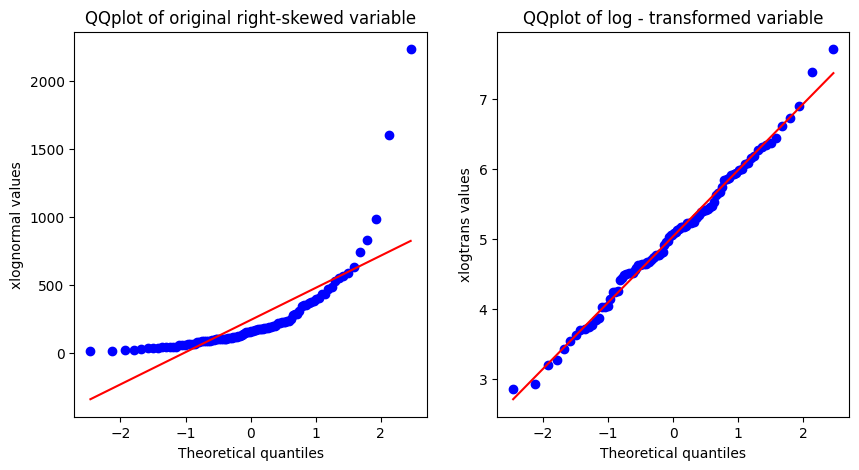

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(Xlognormal['Xlognormal'],dist='norm',plot=plt)
plt.ylabel('xlognormal values')
plt.title('QQplot of original right-skewed variable')
plt.subplot(122)
stats.probplot(Xlogtrans['Xlogtrans'],dist='norm',plot=plt)
plt.ylabel('xlogtrans values')
plt.title('QQplot of log - transformed variable')
plt.show()

##### b] square transformation : we apply it on left skewed data 
###### reciprocal transorm , sqroot transform is less used,but ultimately our end goal is that it is just one line code, so we will use all , and check which improves model accuracy most

In [10]:
trf=FunctionTransformer(func=np.square)
Xlefttrans=trf.fit_transform(Xleft)
Xlefttrans.rename(columns={'Xleft':'Xleftsquaretrans'},inplace=True)
Xlefttrans.head()

,Xleftsquaretrans
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


<Axes: ylabel='Density'>

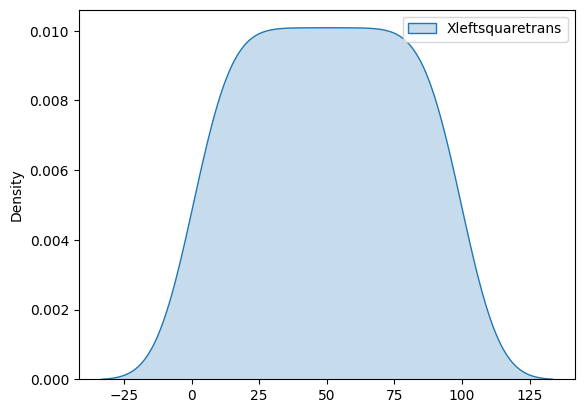

In [11]:
sns.kdeplot(Xlefttrans,fill='g')

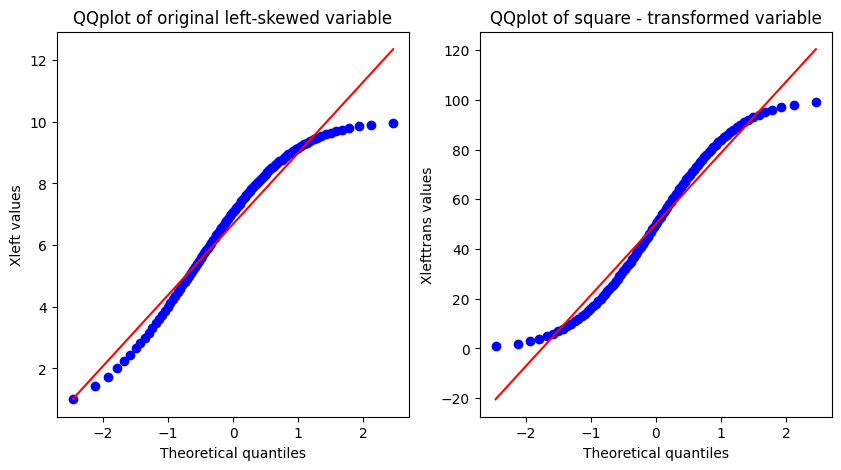

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(Xleft['Xleft'],dist='norm',plot=plt)
plt.ylabel('Xleft values')
plt.title('QQplot of original left-skewed variable')
plt.subplot(122)
stats.probplot(Xlefttrans['Xleftsquaretrans'],dist='norm',plot=plt)
plt.ylabel('Xlefttrans values')
plt.title('QQplot of square - transformed variable')
plt.show()

### the box-cox transformation shows more significant effect than above : using it we can convert any distribtuion irrespective of its skewness to normal distribution, above transformations are just a specific case of it, box cox is generalized transformation
### it is only applicable to positive real numbers , we cannot apply it on 0 and negative real numbers it is its only disadvantage , but 0 can be replaced with 0.000001
### yeo-johnson is more generalized case of box-cox transformation , which works on all real numbers,so we will apply it

##### mainly we just convert  xi -> xi^lambda , estimating value of lambda to get best normal distribution is internal working of libraries , lambda is unique value for each column

In [56]:
from sklearn.datasets import load_breast_cancer
l=load_breast_cancer()
df=pd.DataFrame(l.data,columns=l.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
from sklearn.preprocessing import PowerTransformer
#ptrf=PowerTransformer(method='box-cox')
ptrf=PowerTransformer(method='yeo-johnson')

##### applying yeo johnson transformation

In [58]:
dfptrans=ptrf.fit_transform(df)
dfptrans=pd.DataFrame(dfptrans,columns=df.columns+'_yeo_johnson')
dfptrans.head()

,mean radius_yeo_johnson,mean texture_yeo_johnson,mean perimeter_yeo_johnson,mean area_yeo_johnson,mean smoothness_yeo_johnson,mean compactness_yeo_johnson,mean concavity_yeo_johnson,mean concave points_yeo_johnson,mean symmetry_yeo_johnson,mean fractal dimension_yeo_johnson,...,worst radius_yeo_johnson,worst texture_yeo_johnson,worst perimeter_yeo_johnson,worst area_yeo_johnson,worst smoothness_yeo_johnson,worst compactness_yeo_johnson,worst concavity_yeo_johnson,worst concave points_yeo_johnson,worst symmetry_yeo_johnson,worst fractal dimension_yeo_johnson
0,1.134881,-2.678666,1.259822,1.126421,1.504114,2.165938,1.862988,1.848558,1.953067,1.886398,...,1.619635,-1.488367,1.810506,1.652210,1.282792,1.942737,1.730182,1.935654,2.197206,1.723624
1,1.619346,-0.264377,1.528723,1.633946,-0.820227,-0.384102,0.291976,0.820609,0.102291,-0.956577,...,1.578689,-0.288382,1.430616,1.610022,-0.325080,-0.296580,0.070746,1.101594,-0.121997,0.537179
2,1.464796,0.547806,1.454664,1.461645,0.963977,1.163977,1.403673,1.683104,0.985668,-0.292433,...,1.419757,0.071406,1.321941,1.425307,0.580301,1.209701,1.005512,1.722744,1.218181,0.453955
3,-0.759262,0.357721,-0.514886,-0.836238,2.781494,2.197843,1.642391,1.423004,2.360528,2.708925,...,-0.083692,0.228089,-0.039480,-0.436860,2.857821,2.282276,1.675087,1.862378,3.250202,2.517606
4,1.571260,-1.233520,1.583340,1.595120,0.343932,0.762392,1.407479,1.410929,0.090964,-0.511332,...,1.293727,-1.637882,1.316582,1.309486,0.284367,-0.131829,0.817474,0.807077,-0.943554,-0.279402


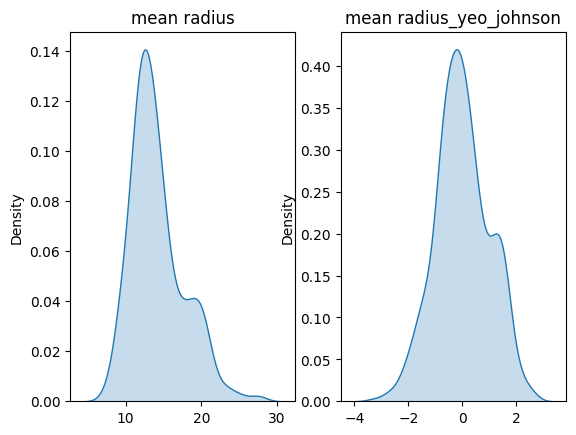

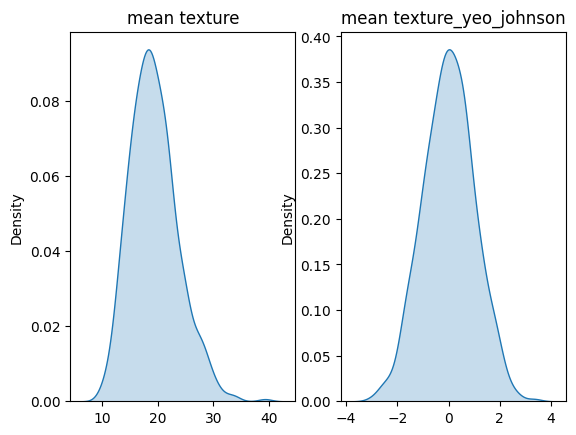

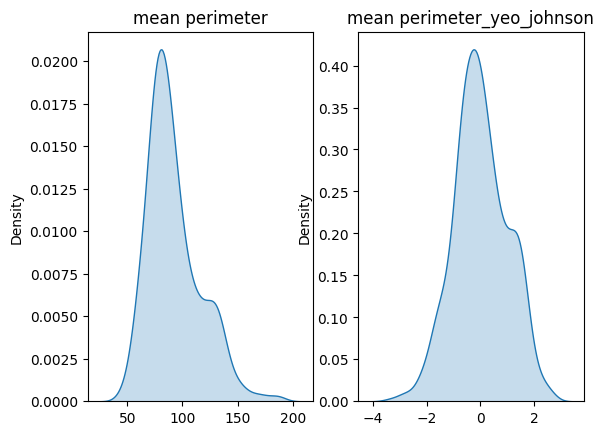

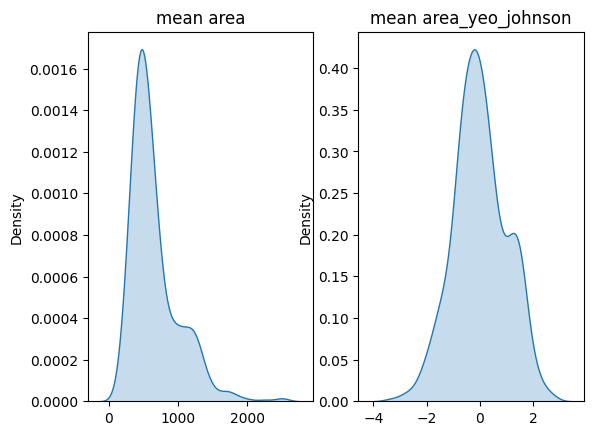

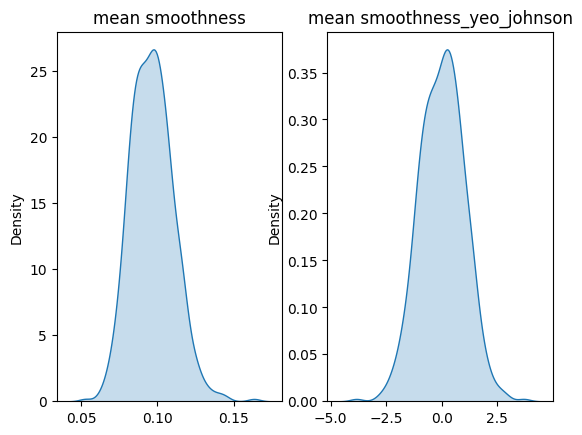

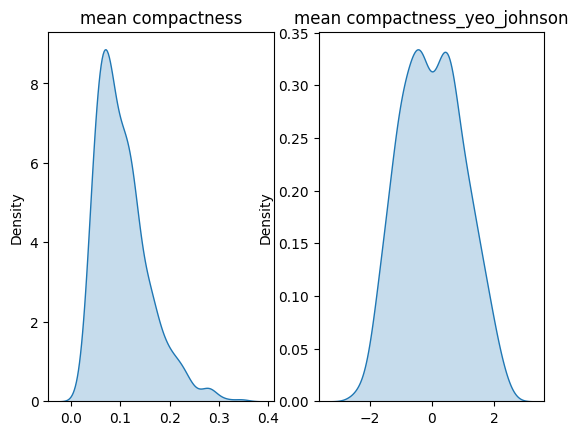

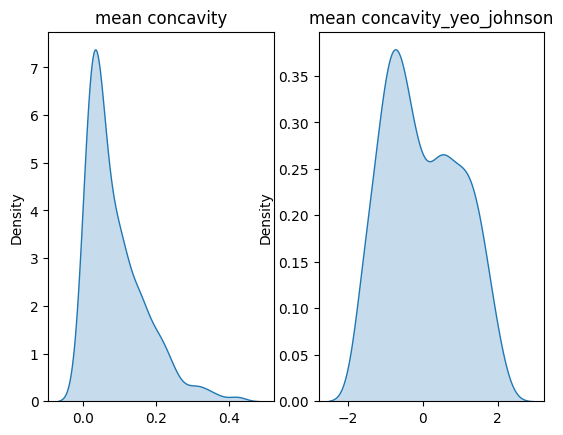

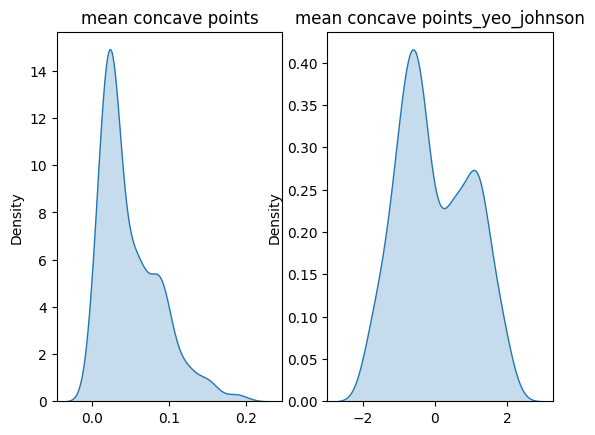

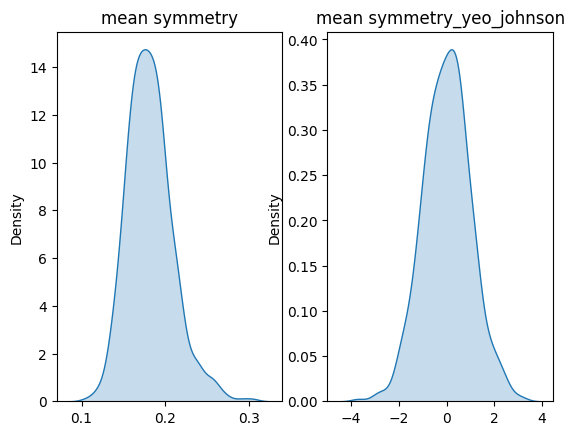

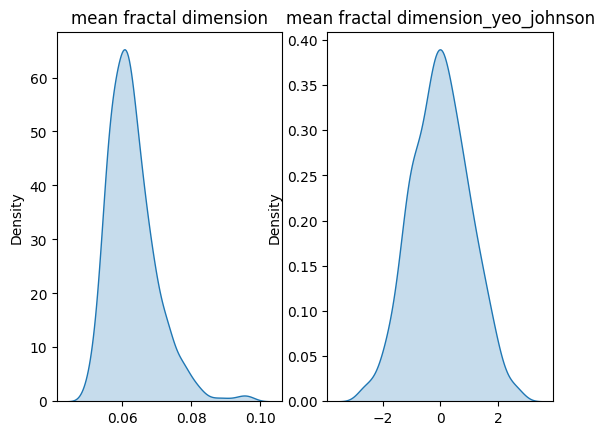

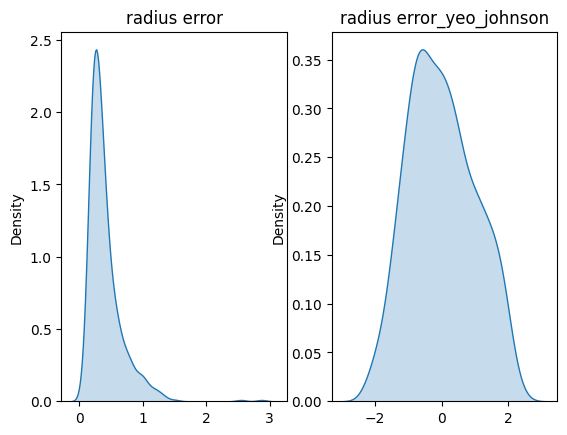

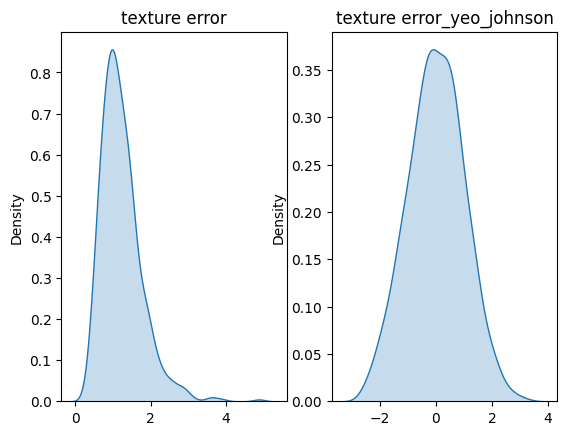

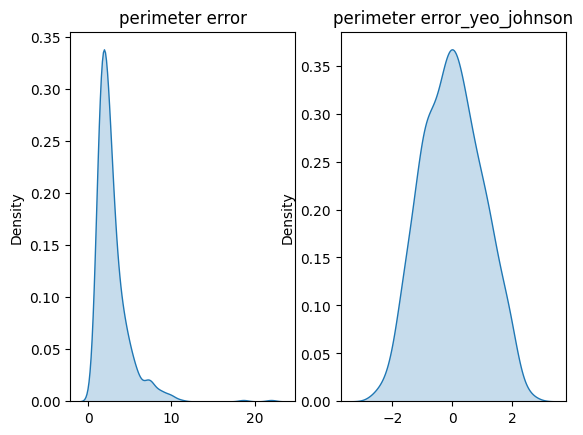

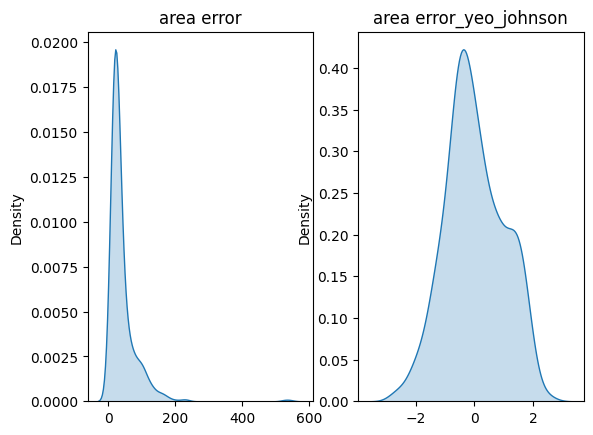

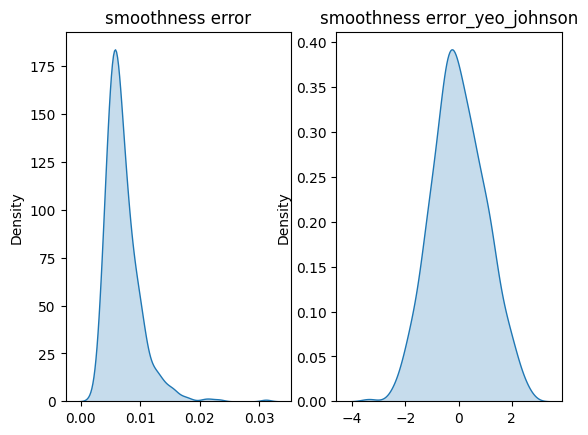

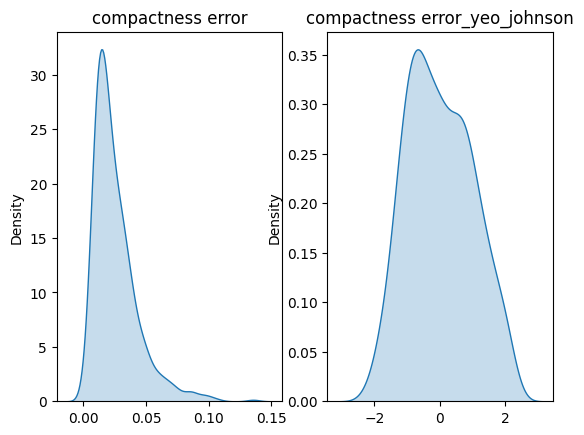

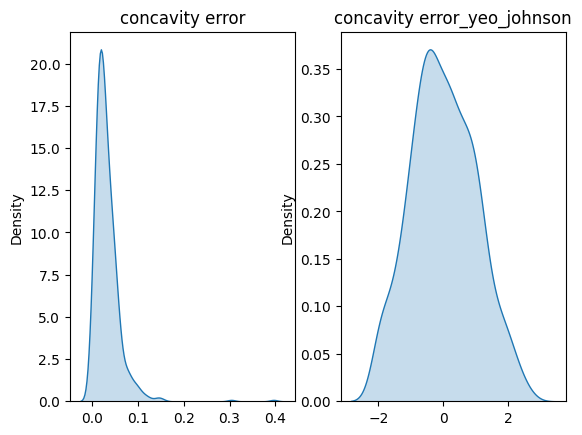

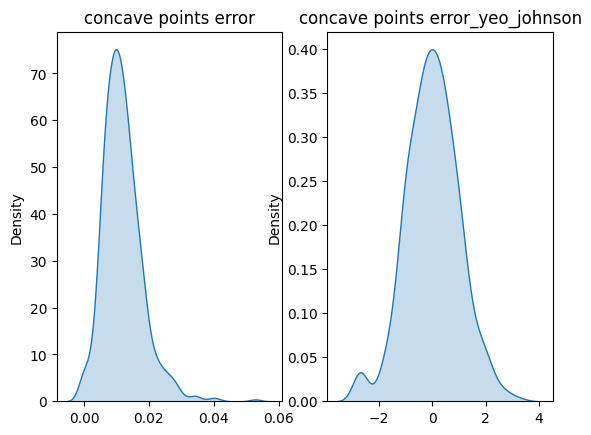

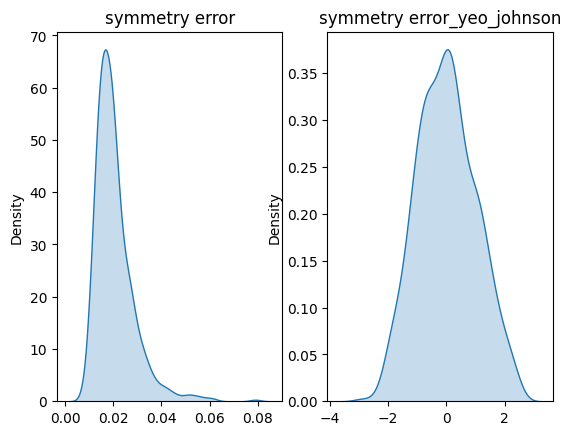

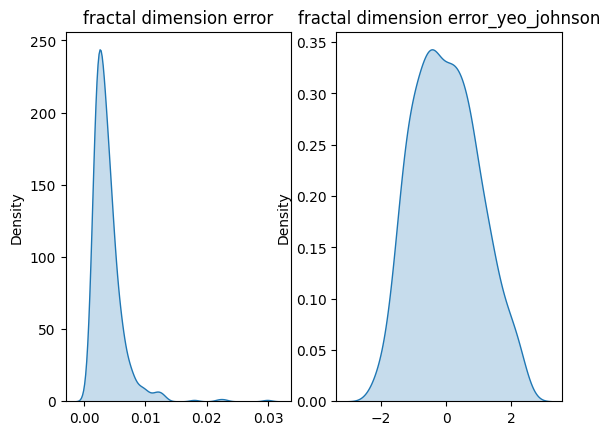

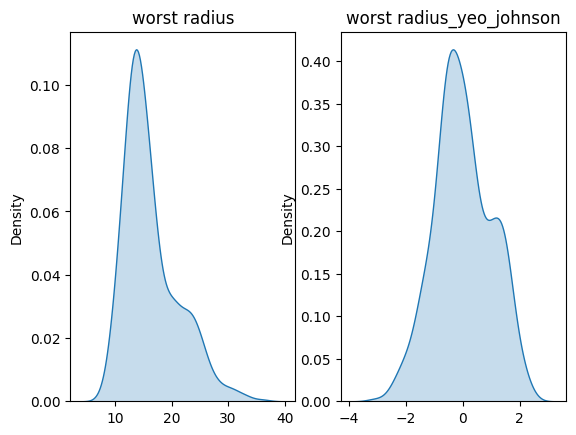

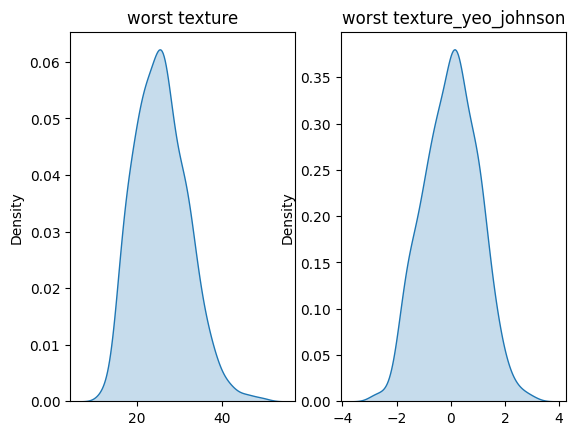

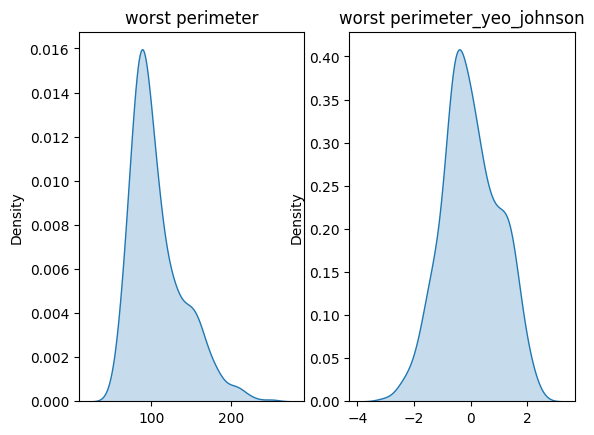

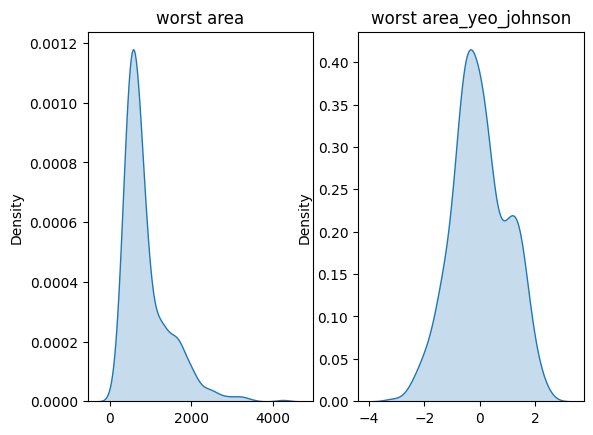

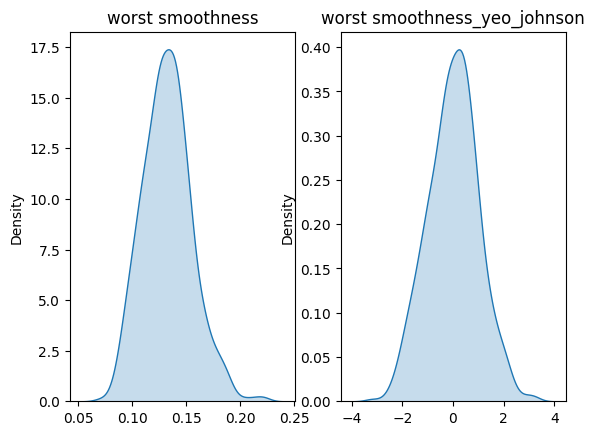

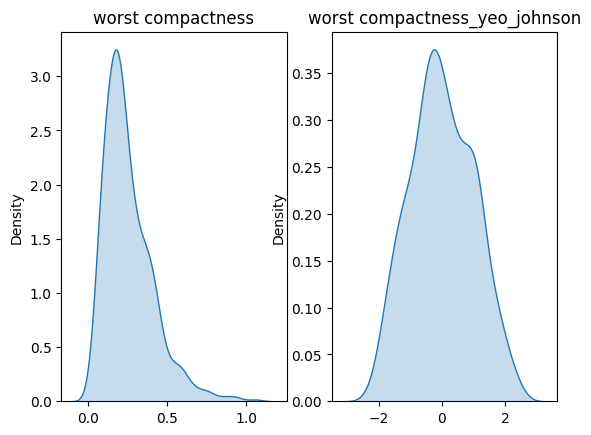

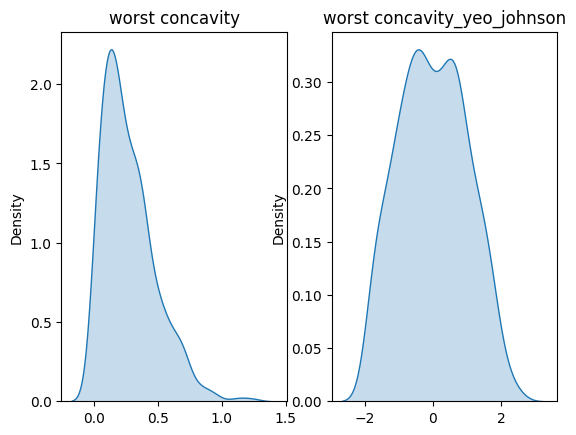

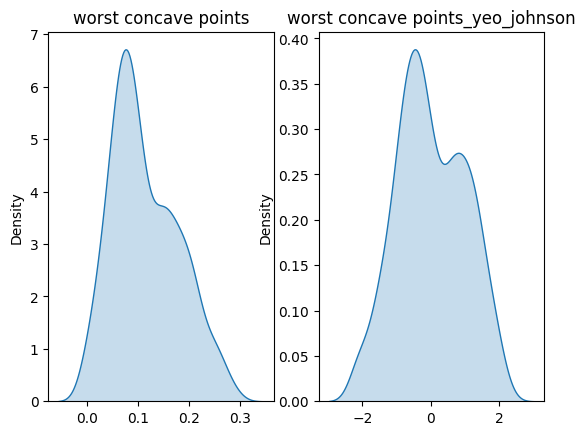

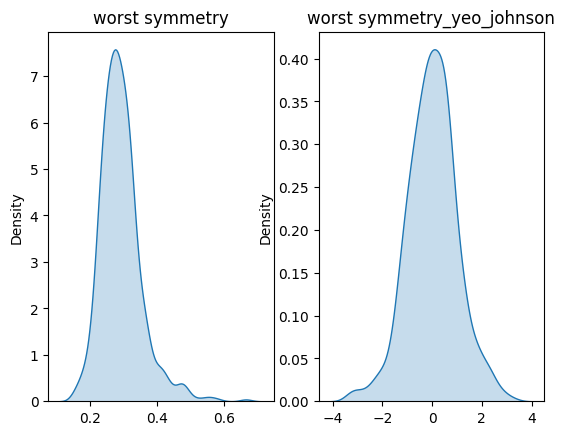

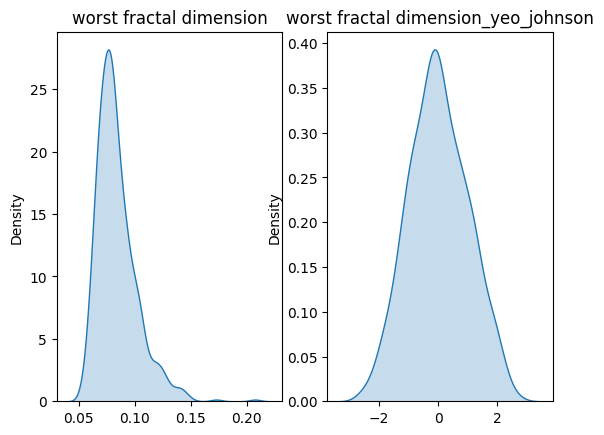

In [59]:
for i in range(30):#no of numeric power transformed columns in dataset is 30
    plt.figure.figsize=(10,5)
    plt.subplot(121)
    sns.kdeplot(np.array(df.iloc[:,i]),fill='g')
    plt.title(df.columns[i])
    plt.subplot(122)
    sns.kdeplot(np.array(dfptrans.iloc[:,i]),fill='m')
    plt.title(dfptrans.columns[i])
    plt.show()

##### see left side are PDFs of transformed variables and right side are PDFs of original variables
##### Power transformer always internally applies standardization , so all PDFs at left are Standard normal distributions , 
## hence using Power Transformer yeo-johnson transformation we can convert any distribution to its standard normal distribution

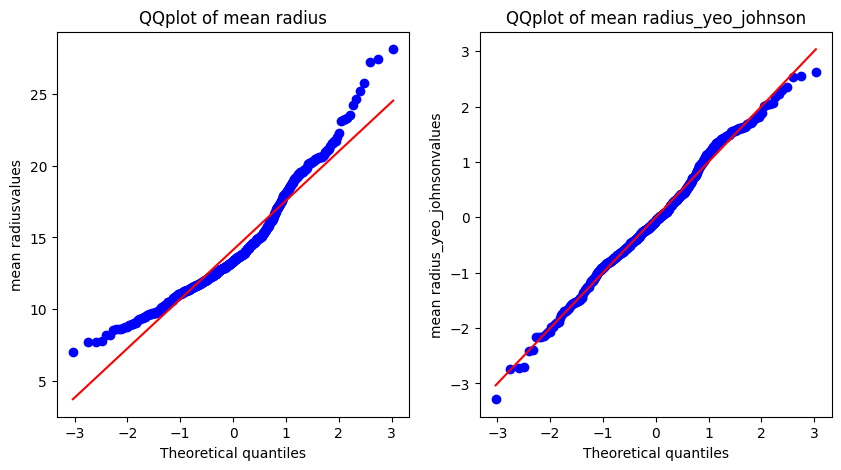

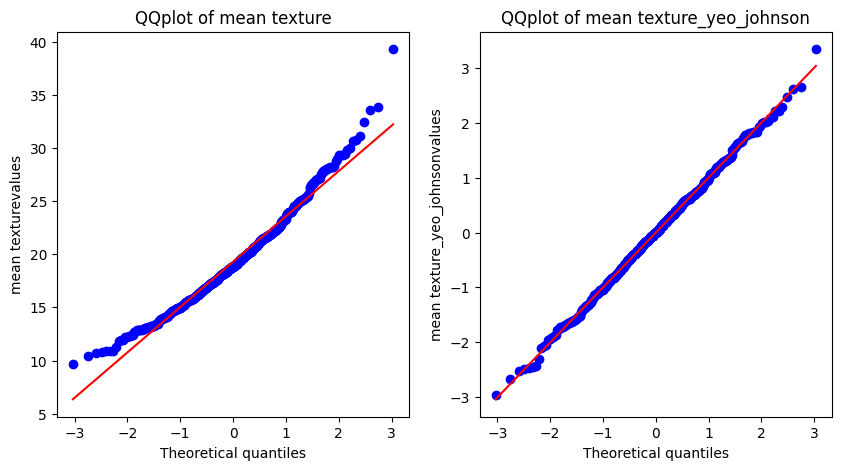

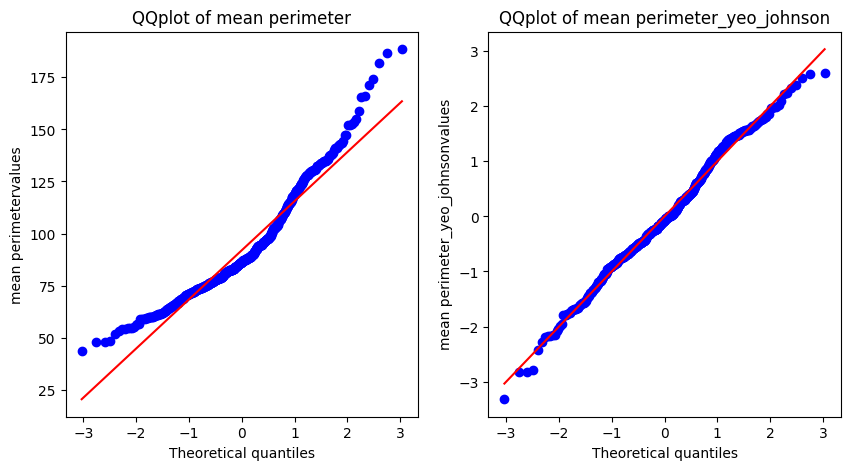

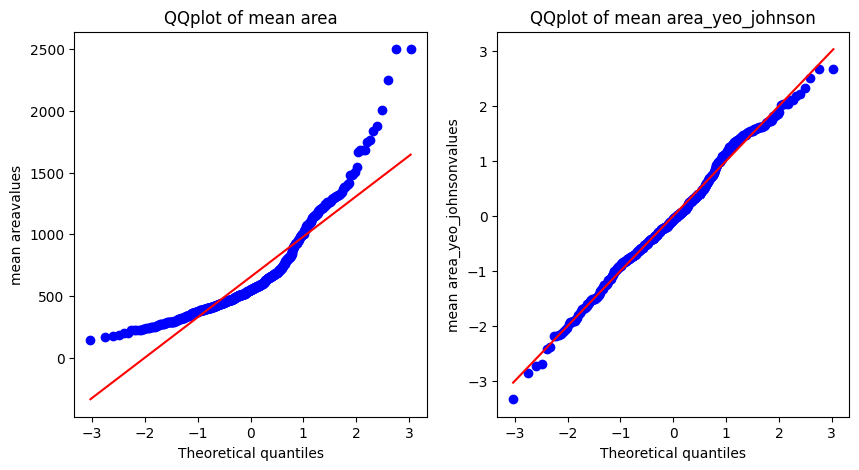

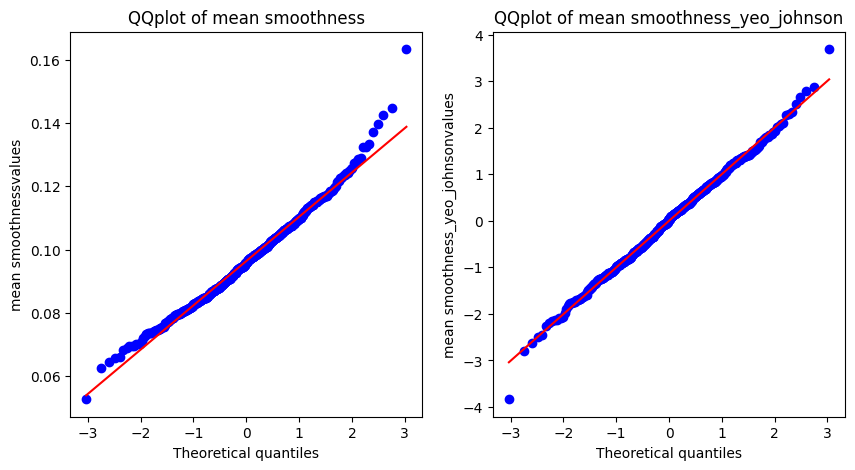

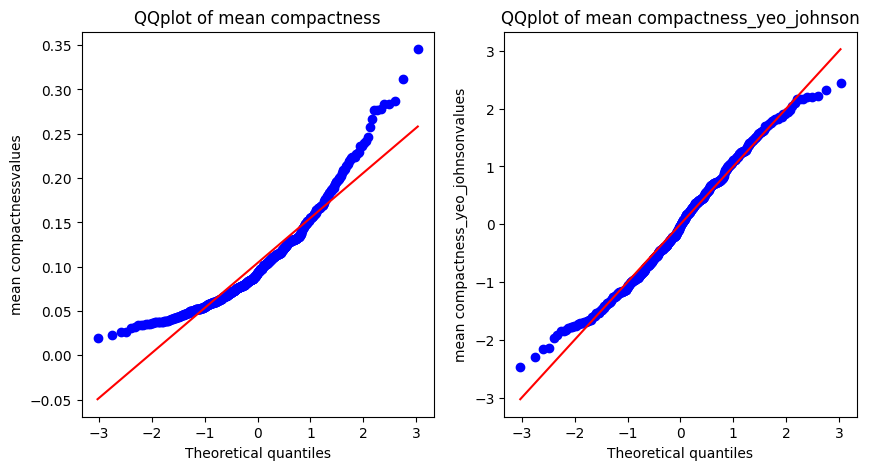

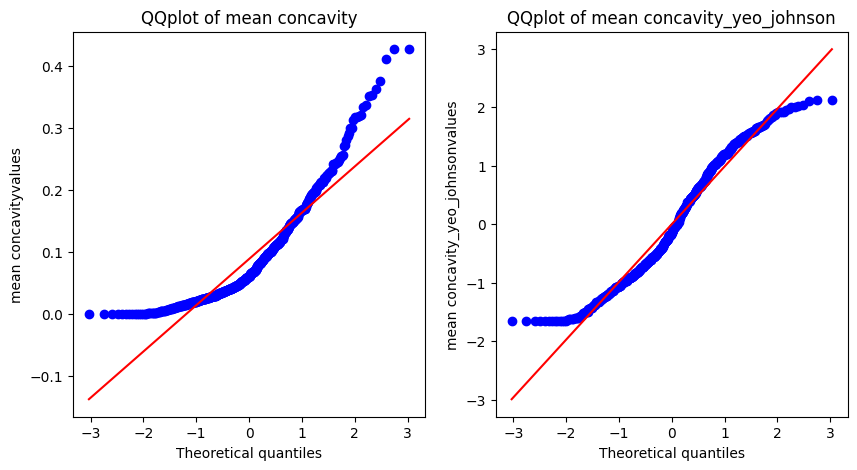

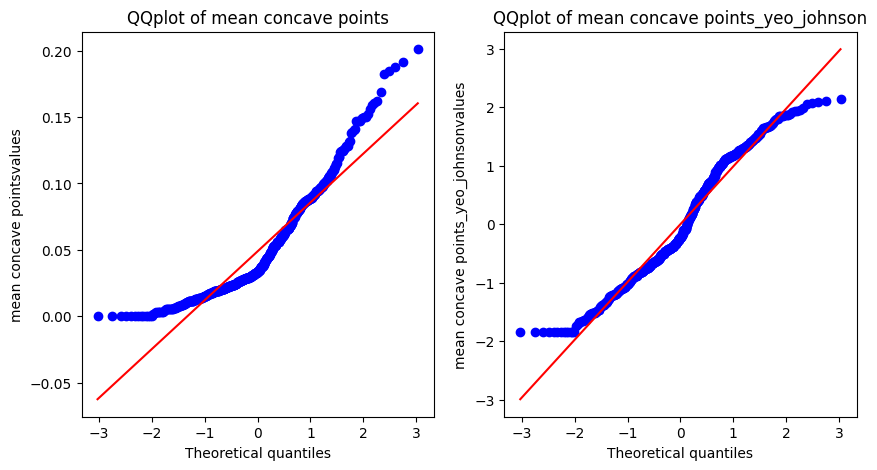

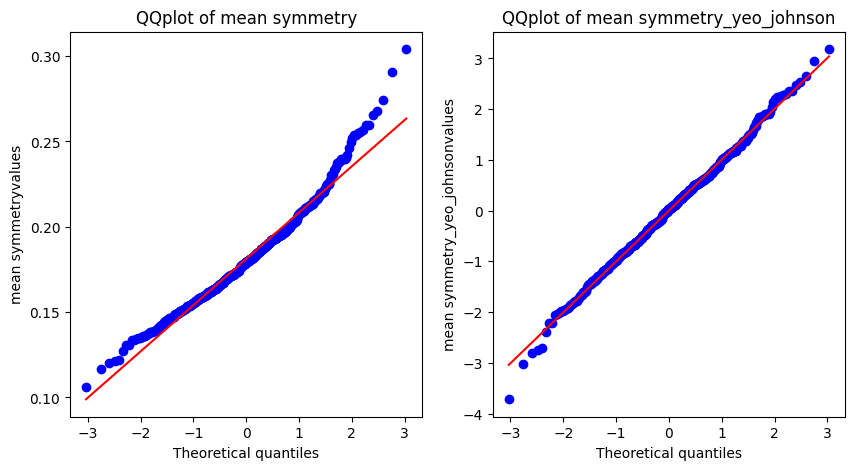

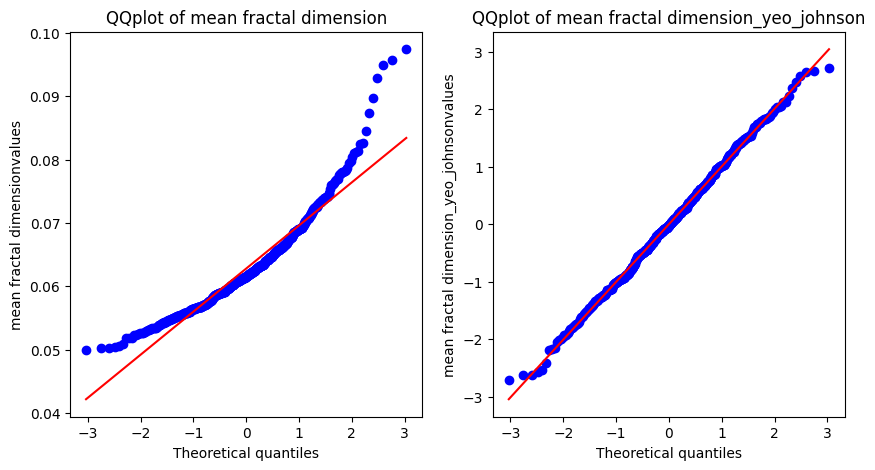

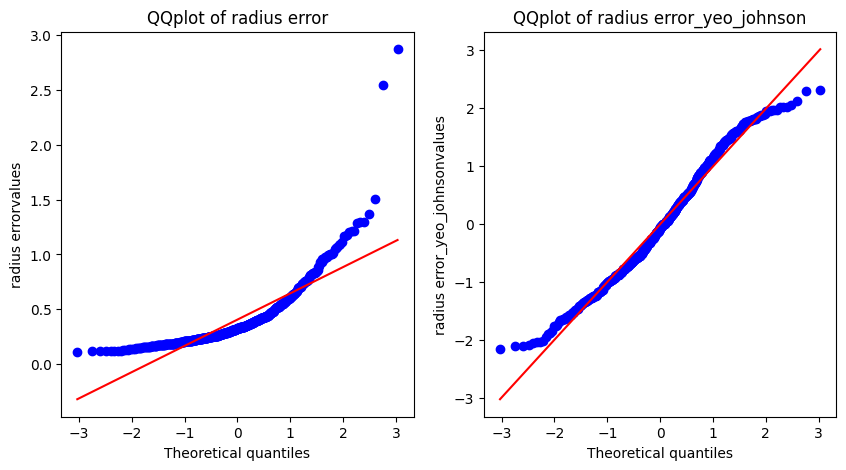

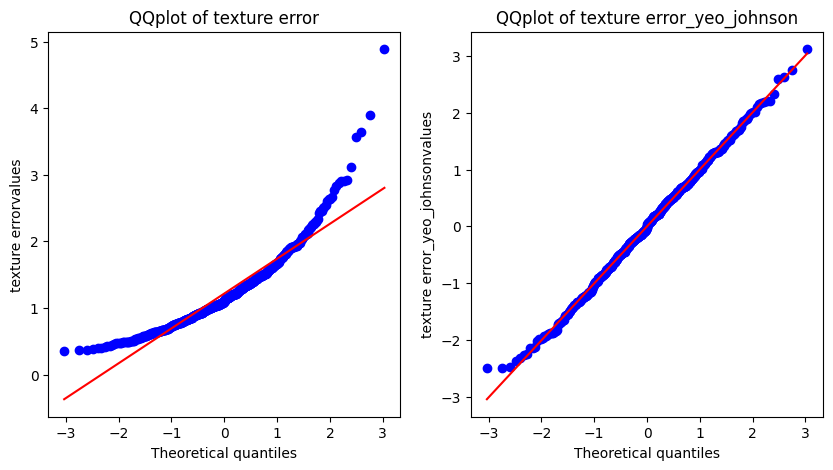

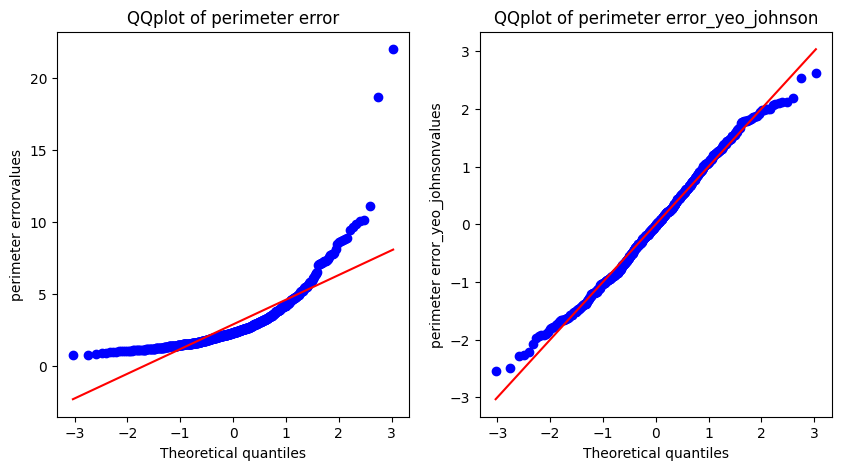

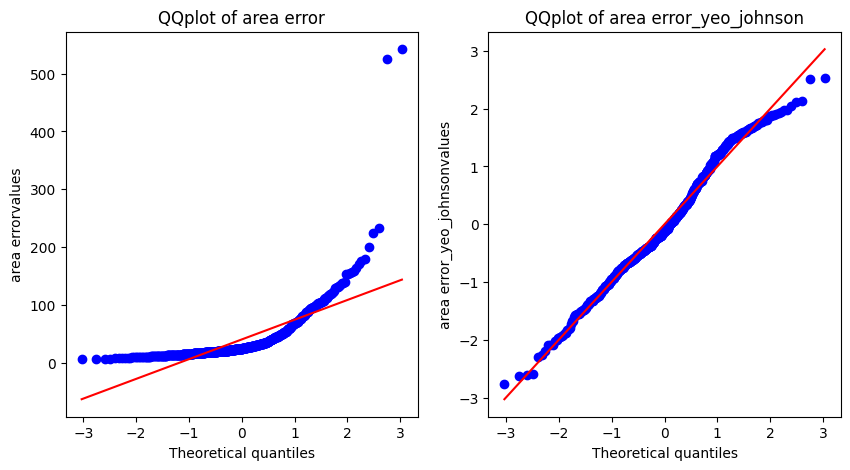

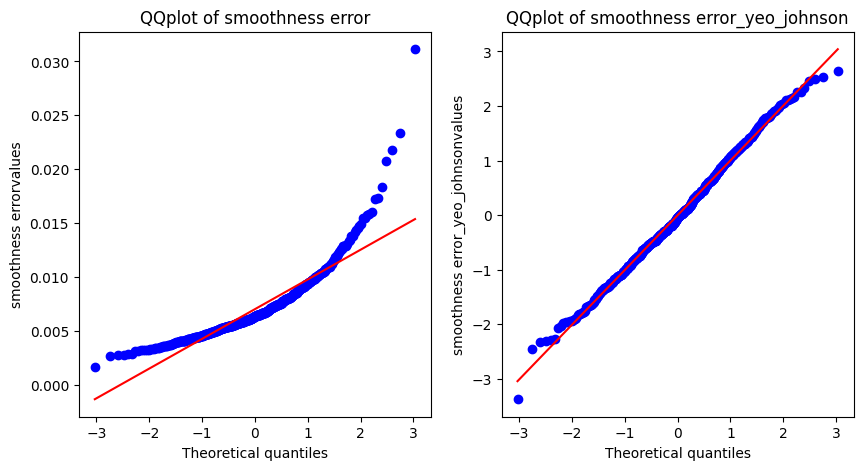

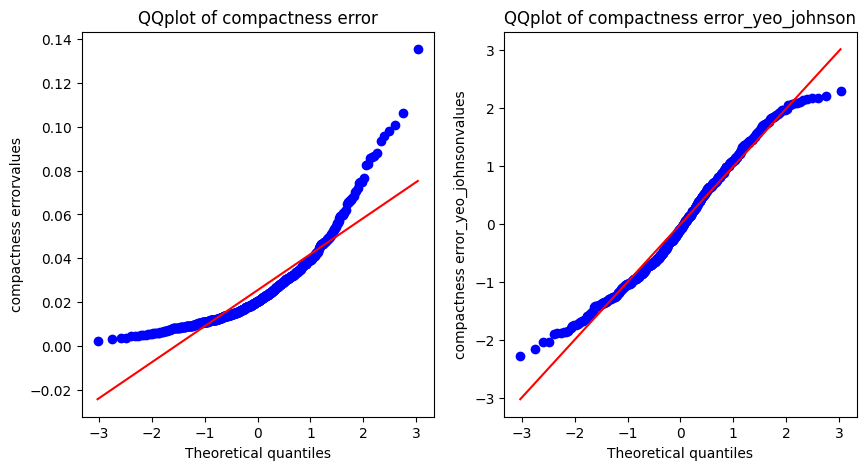

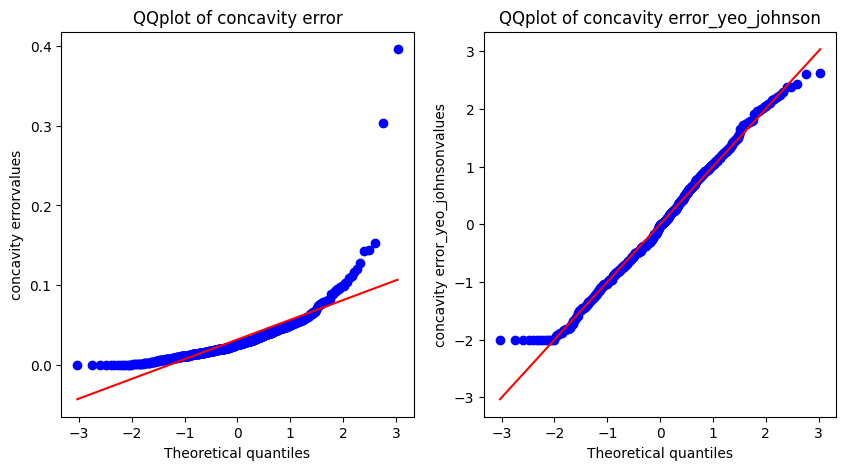

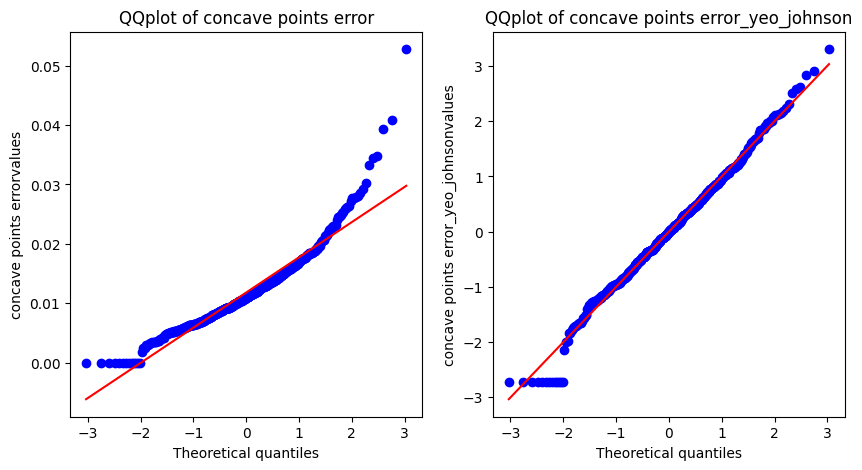

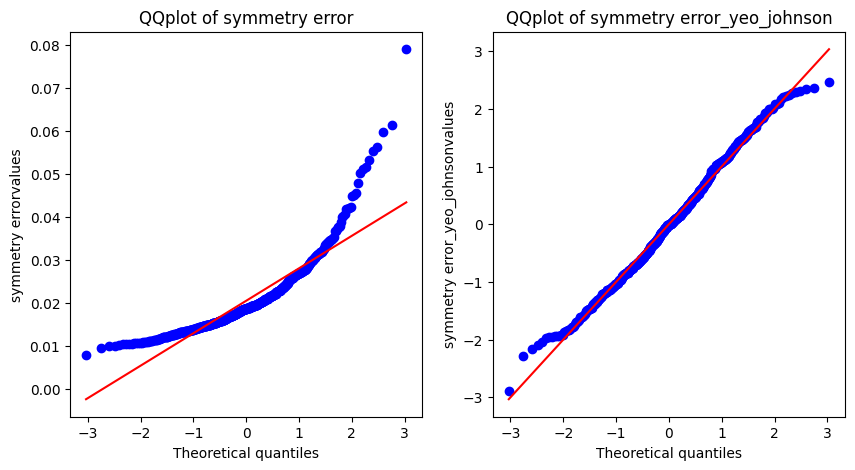

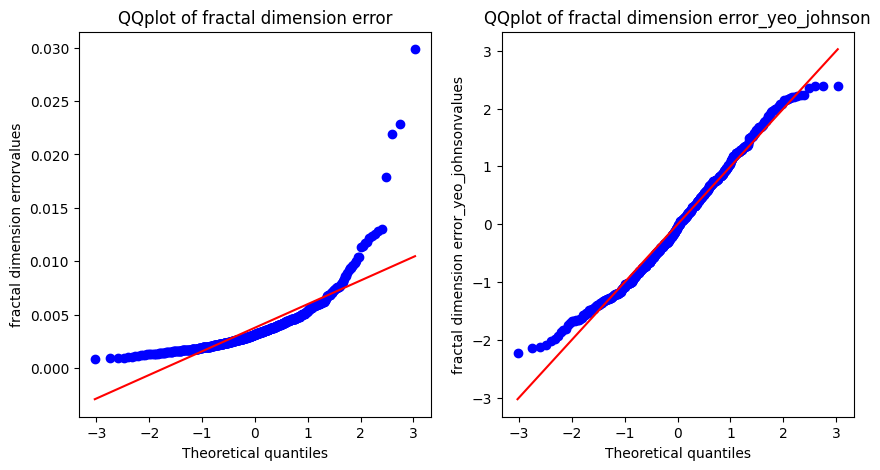

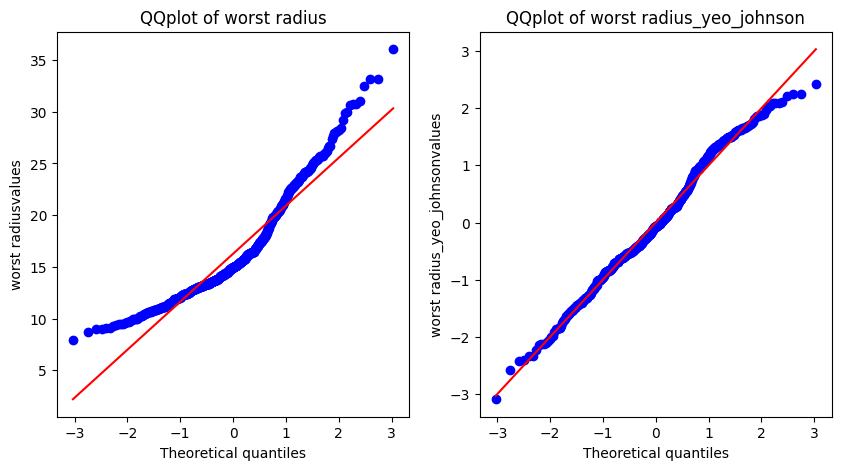

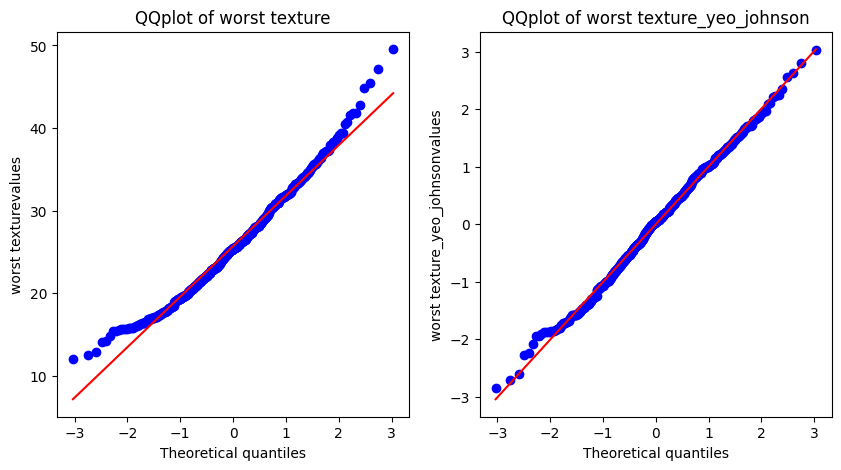

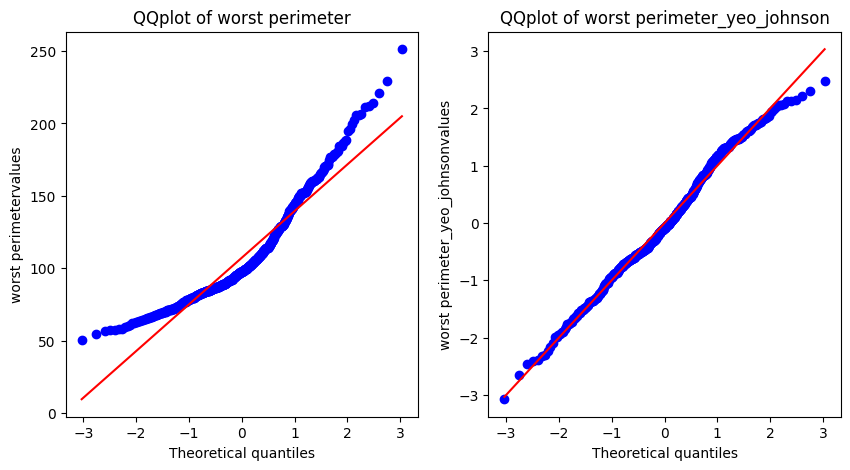

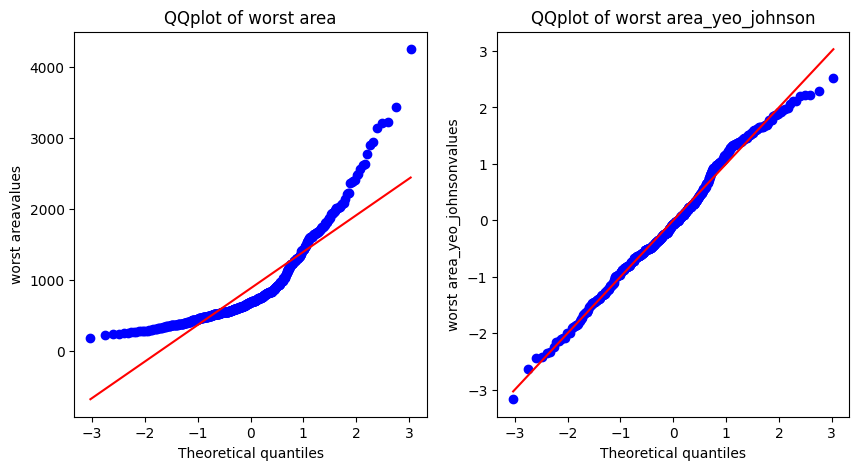

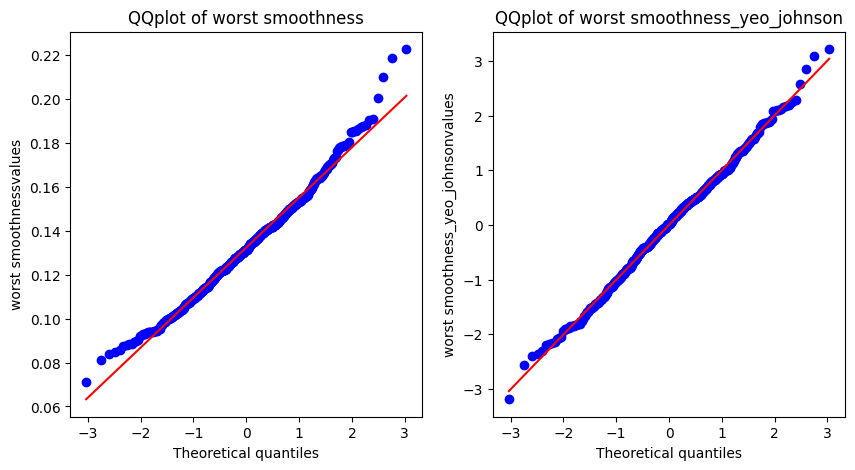

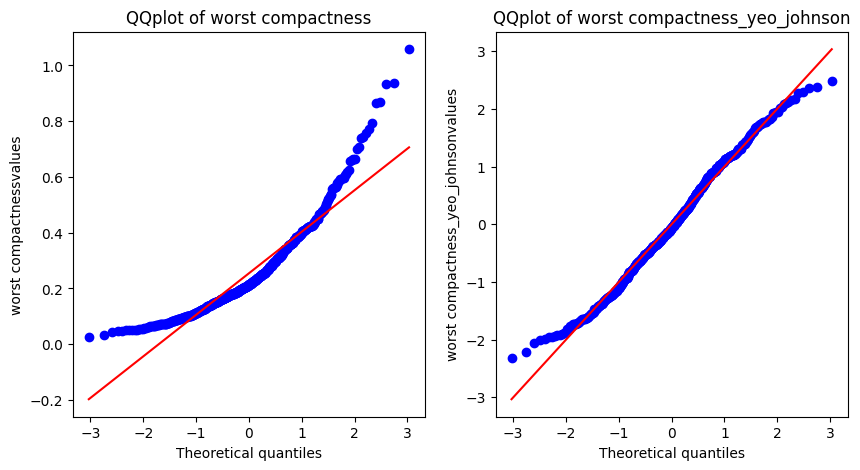

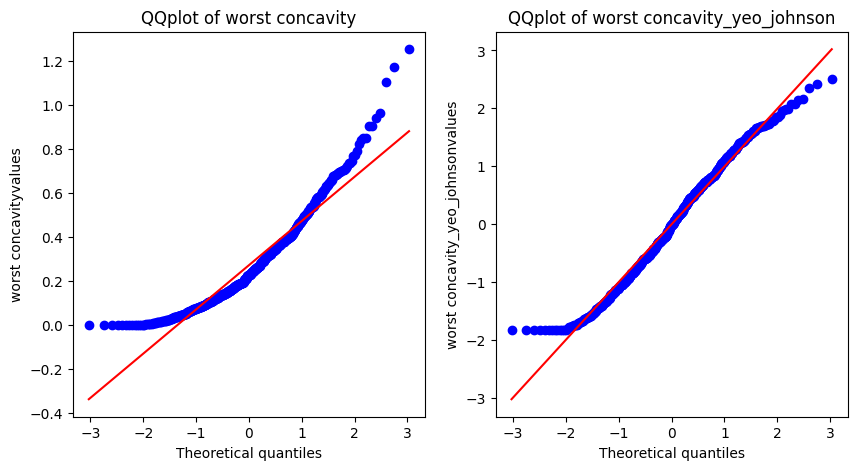

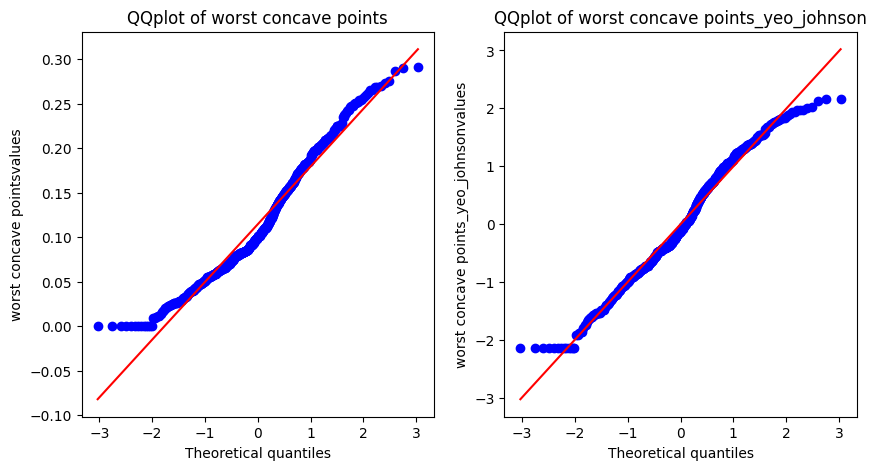

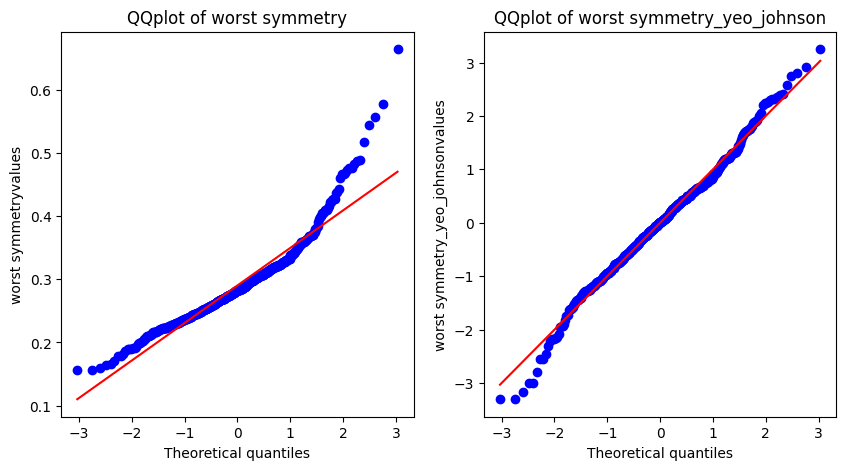

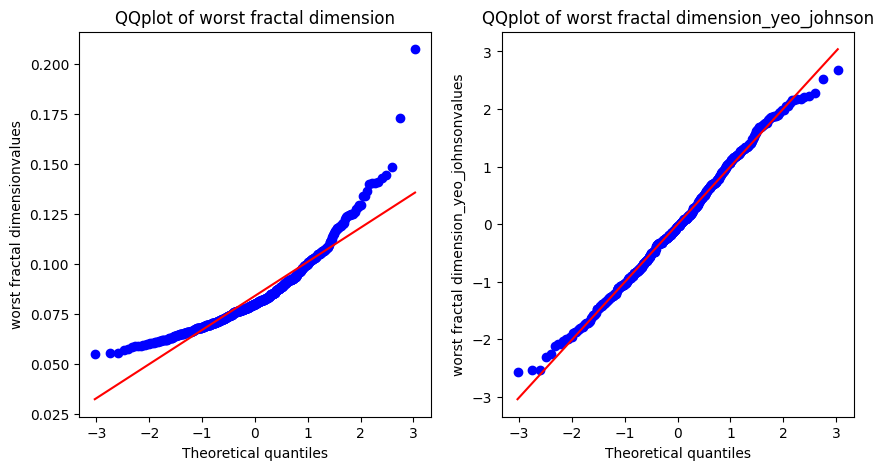

In [61]:
for i in range(30):# 30 is number of numeric power transformed columns in above dataset
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    stats.probplot(np.array(df.iloc[:,i]),dist='norm',plot=plt)
    plt.ylabel(df.columns[i]+'values')
    plt.title('QQplot of '+df.columns[i])
    plt.subplot(122)
    stats.probplot(np.array(dfptrans.iloc[:,i]),dist='norm',plot=plt)
    plt.ylabel(dfptrans.columns[i]+'values')
    plt.title('QQplot of '+dfptrans.columns[i])
    plt.show()

##### in above output right side contains QQplots of original variables , and left side contains QQplots of yeo-johnson power transformed variables
### see all numeric features are converted into standard normal distribution using yeo-johnson power transformer from above QQplots at left